In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.5)

In [2]:
df = pd.read_csv('data/amsterdam_listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706,https://www.airbnb.com/rooms/23726706,20220605131734,2022-06-05,Private room 20 minutes from Amsterdam + Break...,Cousy private room 20 min. from Amsterdam. Sh...,We live in a nice Cousy and clean house with e...,https://a0.muscache.com/pictures/eb6d6636-02d6...,122619127,https://www.airbnb.com/users/show/122619127,...,4.97,4.73,4.87,038469D9AA6BDF1142CE,t,1,0,1,0,1.53
1,35815036,https://www.airbnb.com/rooms/35815036,20220605131734,2022-06-05,"Vrijstaand vakantiehuis, privé tuin aan het water",Bij het pittoreske dorpje Watergang ligt ons p...,U heeft hier diverse mogelijkheden. Zo kunt u ...,https://a0.muscache.com/pictures/e309d415-78de...,269425139,https://www.airbnb.com/users/show/269425139,...,4.98,4.81,4.83,NaN,f,1,1,0,0,2.65
2,31553121,https://www.airbnb.com/rooms/31553121,20220605131734,2022-06-05,Quiet Guesthouse near Amsterdam,Welcome to the countryside north of Amsterdam ...,Within 6 kilometers of the city center you'll ...,https://a0.muscache.com/pictures/64edc273-3b2b...,76806621,https://www.airbnb.com/users/show/76806621,...,4.95,4.62,4.59,NaN,f,1,1,0,0,2.02
3,34745823,https://www.airbnb.com/rooms/34745823,20220605131734,2022-06-05,"Apartment ' Landzicht', nearby Amsterdam","Apartment 'Landzicht', one of our three apartm...",Beautiful apartment 'Landzicht’ located at a b...,https://a0.muscache.com/pictures/ceaafefc-7ccd...,238083700,https://www.airbnb.com/users/show/238083700,...,4.97,4.87,4.90,NaN,f,3,3,0,0,1.08
4,44586947,https://www.airbnb.com/rooms/44586947,20220605131734,2022-06-05,"Weesp, 2 kamers vlakbij Amsterdam",Ruime woning met 2 slaapkamers. 1 slaapkamer m...,Woning is gelegen in een gezellige nieuwbouwwi...,https://a0.muscache.com/pictures/6460aaa6-83df...,360838688,https://www.airbnb.com/users/show/360838688,...,4.93,5.00,4.80,NaN,f,1,0,1,0,0.68


In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Cleaning the price column

In [4]:
df['price_cleansed'] = df['price'].str.replace('$','').replace(',','',regex=True).astype(float)
df['price_cleansed'].value_counts()

150.0     249
200.0     186
250.0     151
100.0     149
120.0     133
         ... 
428.0       1
2000.0      1
824.0       1
356.0       1
451.0       1
Name: price_cleansed, Length: 532, dtype: int64

In [5]:
df['price_cleansed'].mean()

198.01960149036125

In [6]:
df['price_cleansed'].median()

160.0

## Filters (conditions)

In [7]:
def create_price_hist(df,title='',bins=10):
    plt.figure(figsize=(15,8))
    sns.histplot(df,stat='percent', bins=bins)
    plt.title(title)
    plt.xlabel('Price €')
    plt.ylabel('Percentage %')
    plt.show()
    

In [8]:
price_limit = 500
min_reviews = 12
bus_units = 2
local_units = 2

# Is more expensive to stay at an aibnb's superhost airbnb?

In [9]:
data_super_host = df[(df['host_is_superhost']=='t') & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']
data_not_super_host = df[(df['host_is_superhost'] == 'f') & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']

print(f'Mean price of super host listings: € {data_super_host.mean():.2f}')
print(f'Median price of super host listings: € {data_super_host.median():.2f}')
print(f'Total of super host listings: {len(data_super_host)}')
print('-----------------------------------------------------')
print(f'Mean price of regular host listings: € {data_not_super_host.mean():.2f}')
print(f'Median price of regular host listings: € {data_not_super_host.median():.2f}')
print(f'Total of regular host listings: {len(data_not_super_host)}')

Mean price of super host listings: € 151.56
Median price of super host listings: € 130.00
Total of super host listings: 729
-----------------------------------------------------
Mean price of regular host listings: € 168.36
Median price of regular host listings: € 145.00
Total of regular host listings: 628


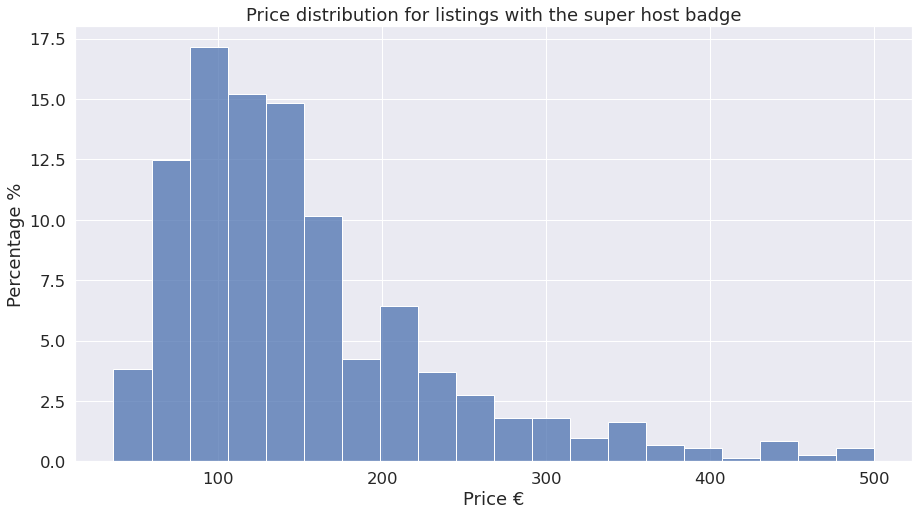

In [10]:
create_price_hist(data_super_host,f'Price distribution for listings with the super host badge',20)

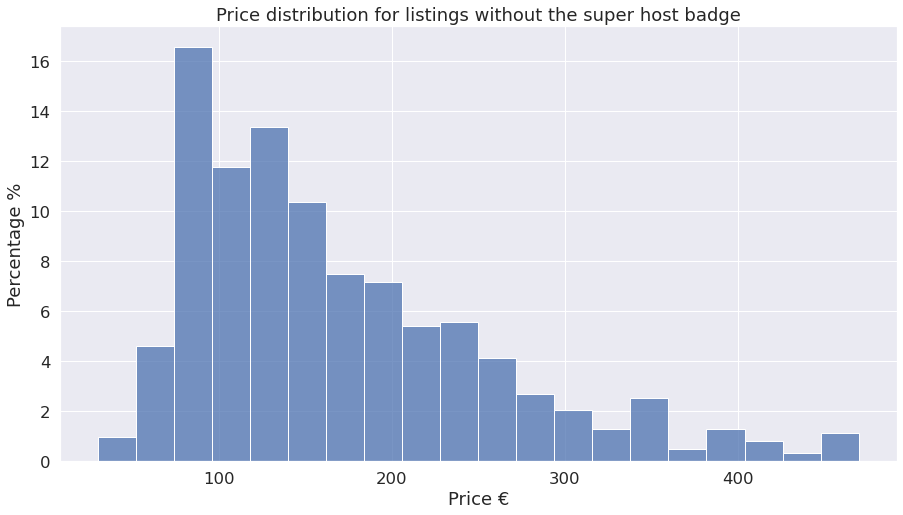

In [11]:
create_price_hist(data_not_super_host,f'Price distribution for listings without the super host badge',20)

# How "professional" hosts impact the airbnb prices? 

In [12]:
ml = df[(df['property_type']=='Entire rental unit')]['calculated_host_listings_count_entire_homes'].value_counts().sort_index()
ml_clean = pd.concat([ml.iloc[1:9], pd.Series(np.sum(ml.iloc[9:]))],ignore_index=True)

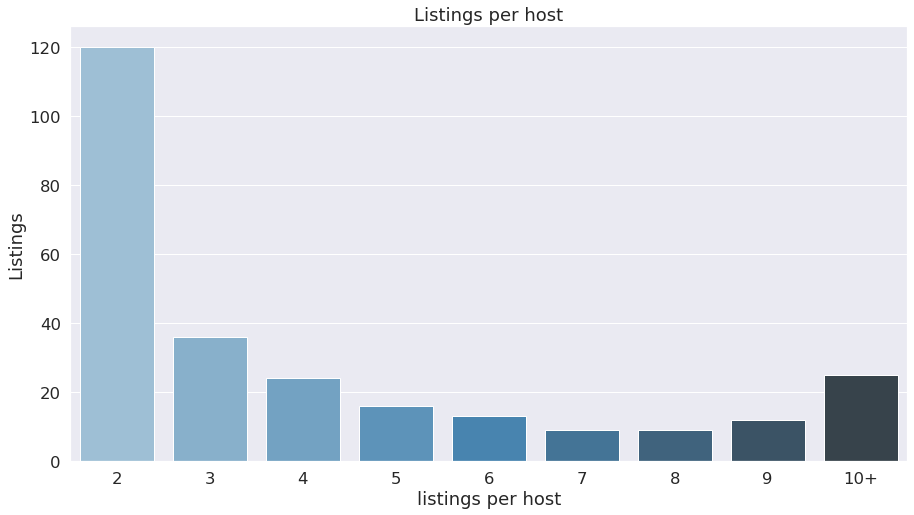

In [13]:
plt.figure(figsize=(15,8))
plt.title('Listings per host')
plt.xlabel('listings per host')
plt.ylabel('Listings')
sns.barplot(x=['2','3','4','5','6','7','8','9','10+'],y=ml_clean,palette="Blues_d")
plt.show()

In [14]:
data_bus = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] >= bus_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']
data_local = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] <  local_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']

print(f'Mean price for business: €{data_bus.mean():.2f}')
print(f'Median price for business:  €{data_bus.median():.2f}')
print(f'Total of business listings: {len(data_bus)}')
print('------------------------------------------------')
print(f'Mean price for local: €{data_local.mean():.2f}')
print(f'Median price for local: €{data_local.median():.2f}')
print(f'Total of local listings: {len(data_local)}')


Mean price for business: €231.70
Median price for business:  €220.00
Total of business listings: 61
------------------------------------------------
Mean price for local: €207.42
Median price for local: €179.00
Total of local listings: 129


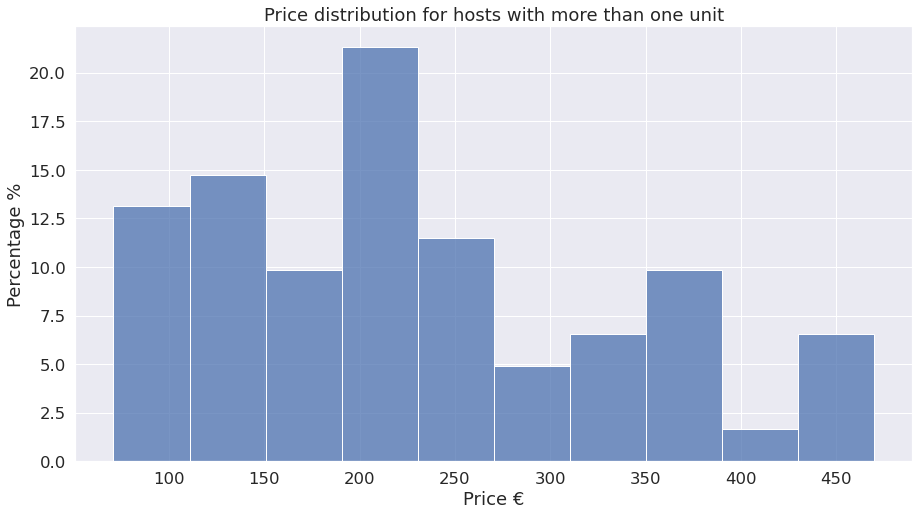

In [15]:
create_price_hist(data_bus,f'Price distribution for hosts with more than one unit')

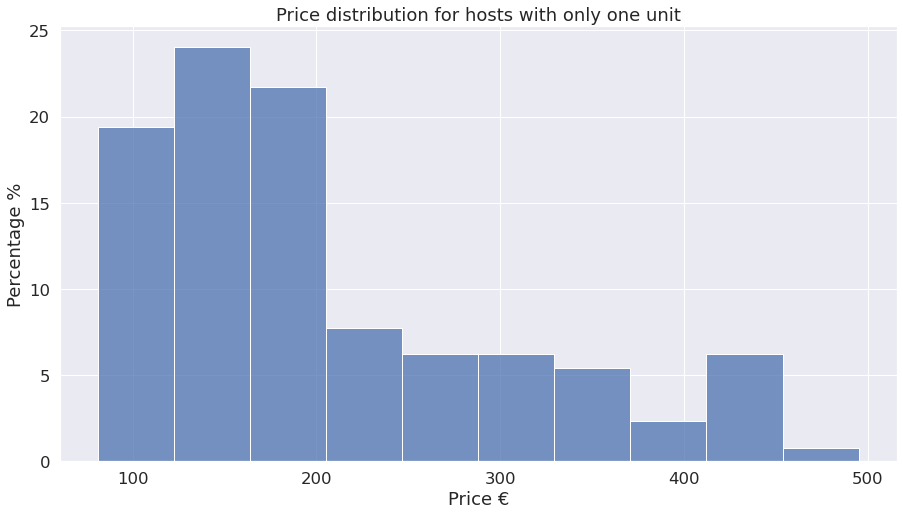

In [16]:
create_price_hist(data_local,'Price distribution for hosts with only one unit')